# Import Data

In [1]:
# import modules
import pandas as pd

In [2]:
# import raw data
df = pd.read_csv('dataframes/pos_df.csv')
df.sample(3)

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
4255,GM1 42:3;3 (LCB 18:0;2-2H2O),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,34.0,54.0,34.0,27.0
2013,NAPE 42:10+NH4 (-NAPE (22:6 NH4)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3364,SGalCer 30:1;3 (LCB 18:0;2-2H2O),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# import lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(3)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
3907,SM 42:1;4 (SM),SM,42,1
1294,LMMPE O-28:5 (-MMPE),LMMPE O,28,5
1495,NAPE 42:12+NH4 (-NAPE (18:0 NH4)),NAPE,42,12


In [4]:
# import experiment metedata
df_exps = pd.read_csv('dataframes/pos_exps_df_meta.csv')
df_exps.head()

,sample,protein
0,CAS9-A,CAS9
1,CAS9-A.1,CAS9
2,CAS9-B,CAS9
3,CAS9-B.1,CAS9
4,CAV_A,CAV


In [5]:
# import head group metadata
df_hg = pd.read_csv('dataframes/pos_df_hg.csv')
df_hg.head(3)

,Head Group,Head Group 2
0,Hex2Cer,Hex_Cer
1,GT3,GT
2,GT2,GT


In [6]:
# merge df_hg and df_meta
df_meta2 = df_meta.merge(df_hg, on=['Head Group'])
df_meta2.head(1)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,26,3,Hex_Cer


In [7]:
# rename columns by protein
df_p = df.rename(columns=df_exps.set_index('sample')['protein'])
df_p = df_p.drop(columns=['RAJU'])
df_p = df_p.set_index('Sample Name')
df_p.columns.names=['protein']
df_p.head(1)

protein,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0,143.0,125.0,132.0,171.6091,182.9007,120.0,120.0,281.3523,184.3462,...,130.0,142.0,68.0529,46.4729,88.0,91.0,229.5233,278.1255,206.0,182.0


# Normalize Data

In [8]:
# define functions to normalize down column
def norm_col(df):
    return df/df.sum()

In [9]:
def norm_row(df):
    return df.div(df.sum(axis=1), axis=0)

In [10]:
# move sample name column into index
df_norm = df_p
df_norm.head(1)

protein,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0,143.0,125.0,132.0,171.6091,182.9007,120.0,120.0,281.3523,184.3462,...,130.0,142.0,68.0529,46.4729,88.0,91.0,229.5233,278.1255,206.0,182.0


In [11]:
# normalize down the columns
df_norm_col = df_norm/df_norm.sum()
df_norm_col.head(1)

protein,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.000041,0.000035,0.000027,0.00003,0.000052,0.000056,0.000041,0.000041,0.000076,0.00005,...,0.000045,0.000044,0.000022,0.000015,0.000029,0.000029,0.000053,0.000062,0.000052,0.000046


In [12]:
# normalize across row
df_norm_row = df_norm.div(df_norm.sum(axis=1), axis=0)
df_norm_row.head(1)

protein,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.024047,0.020591,0.017999,0.019007,0.024711,0.026337,0.017279,0.017279,0.040513,0.026545,...,0.018719,0.020447,0.009799,0.006692,0.012672,0.013104,0.03305,0.040049,0.029663,0.026207


In [13]:
# normalize across both row & col
df_norm = df_norm_col.div(df_norm_col.sum(axis=1), axis=0)
df_norm.head(1)

protein,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.020109,0.017009,0.013354,0.01481,0.025356,0.027332,0.020265,0.020058,0.037429,0.0246,...,0.021906,0.021732,0.010703,0.007327,0.014411,0.014257,0.026237,0.030193,0.025487,0.022504


# Average/groupby protein

In [14]:
# normalized by row & col
df_norm_avg = df_norm.T.reset_index().rename(columns={'index':'protein'})
df_norm_avg = df_norm_avg.groupby('protein').mean().T
df_norm_avg.head()

protein,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
Sample Name,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.016321,0.023252,0.028633,0.031835,0.029677,0.032569,0.029765,0.020168,0.011674,0.026105
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.065121,0.032380,0.012078,0.013554,0.012055,0.020480,0.029845,0.001851,0.047381,0.015253
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.012328,0.032438,0.021996,0.025539,0.030487,0.028882,0.024480,0.029179,0.022799,0.021873
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),0.017954,0.042018,0.021450,0.029334,0.024417,0.030182,0.015766,0.022369,0.025732,0.020779
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),0.029993,0.024854,0.019933,0.020654,0.023985,0.020611,0.018442,0.032176,0.036749,0.022602


In [15]:
# normalized by row only
df_norm_row_avg = df_norm_row.T.reset_index().rename(columns={'index':'protein'})
df_norm_row_avg = df_norm_row_avg.groupby('protein').mean().T
df_norm_row_avg.head()

protein,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
Sample Name,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.020411,0.021402,0.031956,0.028405,0.027034,0.033241,0.027860,0.016882,0.010567,0.032242
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.078368,0.028599,0.013087,0.011465,0.010702,0.019837,0.027584,0.001504,0.041317,0.017536
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.015926,0.030322,0.025096,0.023253,0.028544,0.030185,0.023401,0.024605,0.021097,0.027571
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),0.022769,0.038518,0.024130,0.026532,0.022645,0.031431,0.015468,0.018809,0.023712,0.025986
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),0.037998,0.022715,0.022420,0.018439,0.021945,0.021170,0.017250,0.026798,0.033455,0.027809


In [16]:
# normalized by row only
df_norm_col_avg = df_norm_col.T.reset_index().rename(columns={'index':'protein'})
df_norm_col_avg = df_norm_col_avg.groupby('protein').mean().T
df_norm_col_avg.head()

protein,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
Sample Name,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.000033,0.000047,0.000058,0.000065,0.000061,0.000066,0.000061,4.111432e-05,0.000024,0.000053
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.000013,0.000007,0.000002,0.000003,0.000002,0.000004,0.000006,3.813730e-07,0.000010,0.000003
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.000038,0.000099,0.000067,0.000078,0.000093,0.000088,0.000075,8.894810e-05,0.000069,0.000067
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),0.000011,0.000025,0.000013,0.000018,0.000015,0.000018,0.000009,1.345920e-05,0.000015,0.000013
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),0.000090,0.000075,0.000060,0.000062,0.000072,0.000062,0.000055,9.660495e-05,0.000110,0.000068


# Correlation Matrix, whole dataset

In [17]:
import seaborn as sns

In [18]:
df_corr = df_norm_avg.corr()

<AxesSubplot:xlabel='protein', ylabel='protein'>

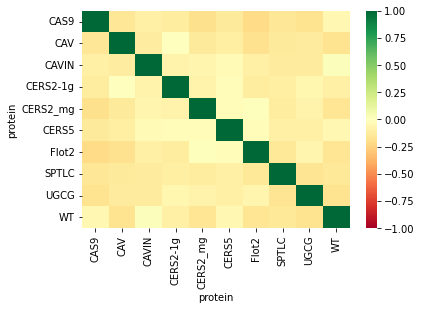

In [19]:
sns.heatmap(df_corr, vmin=-1.0,vmax=1.0, cmap='RdYlGn')

# Clustermap, whole dataset

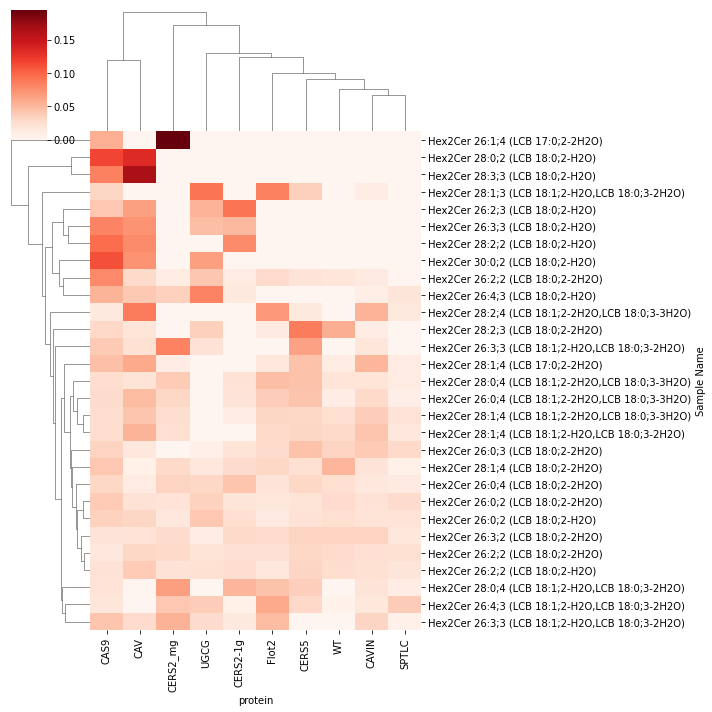

In [20]:
sns.clustermap(df_norm_row_avg.iloc[:29], cmap='Reds')

# Correlation matrix

In [21]:
'''
Returns the correlation matrix for a dataset when comparing by specific proteins.
Data is normalized by column and row. 

Inputs:
df_meta: df with lipid metadata (sample, head group, chain length, unsaturation)
df_p: df with columns named by mutation, rather than individual experiments
col: column name for variable of interest (ex: head group 2)
drop_var: variable of interest (row) to be dropped (ex: head group PE)
drop_protein: mutation (column) to be dropped (ex: WT)
title: title of graph, string
annot: include annotations, takes True or False
'''
def corr_matrix(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Correlation Matrix', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    # normalize by the sample
    df = norm_col(df)
    
    # name columns so that we can group by them once transposed
    df.columns.names=['mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('mutation').mean()
    
    # normalize by the variable (column)
    df = norm_col(df)
    
    # transpose again so proteins are columns, then run a correlation matrix
    corr = df.T.corr()
    
    sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdYlGn', annot=annot).set_title(title)

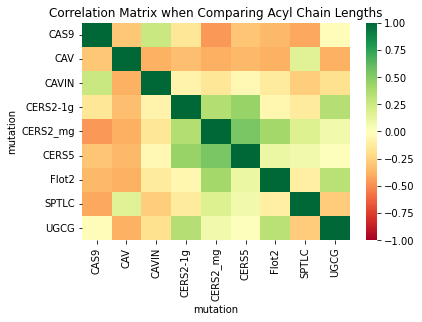

In [22]:
corr_matrix(df_meta2, df_p, 
            col='Acyl Chain Length', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Acyl Chain Lengths'
           )

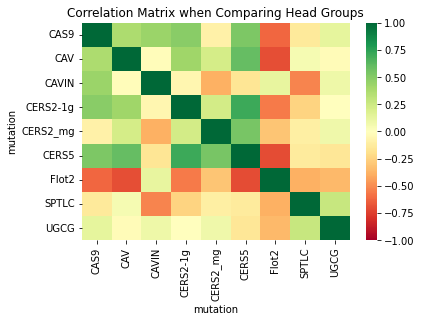

In [23]:
corr_matrix(df_meta2, df_p, 
            col='Head Group 2', 
            drop_var=['PE', 'PC'],
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Head Groups'
           )

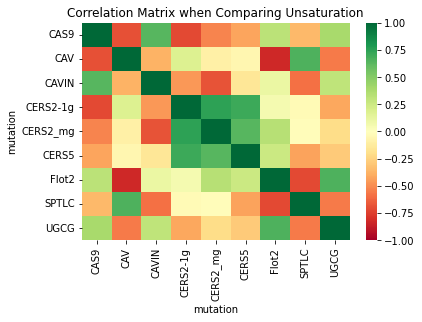

In [24]:
corr_matrix(df_meta2, df_p, 
            col='Unsaturation', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Unsaturation'
           )

# Clustermap of correlation matrix

In [25]:
'''
Returns the correlation matrix sorted by similarity (clustered) for a dataset when comparing by specific proteins
Data is normalized by column and row

Inputs:
df_meta: df with lipid metadata (sample, head group, chain length, unsaturation)
df_p: df with columns named by mutation, rather than individual experiments
col: column name for variable of interest (ex: head group 2)
drop_var: list variable of interests (rows) to be dropped (ex: head group PE)
drop_protein: list of mutations (columns) to be dropped (ex: WT)
title: title of graph, string
annot: include annotations, takes True or False
'''
def cluster_matrix(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Correlation Matrix', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    # normalize by the sample
    df = norm_col(df)
    
    # name columns so that we can group by them once transposed
    df.columns.names=['mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('mutation').mean()
    
    # normalize by the variable (column)
    df = norm_col(df)
    
    # transpose again so proteins are columns, then run a correlation matrix
    corr = df.T.corr()
    
    sns.clustermap(corr, vmin=-1, vmax=1, cmap='RdYlGn', annot=annot).fig.suptitle(title, y=1.05)

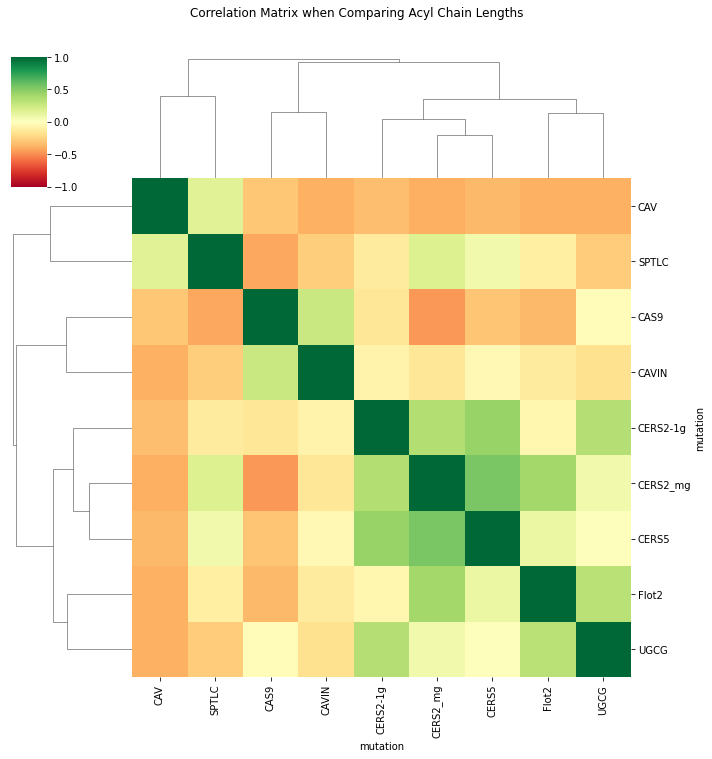

In [26]:
cluster_matrix(df_meta2, df_p, 
            col='Acyl Chain Length', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Acyl Chain Lengths'
           )

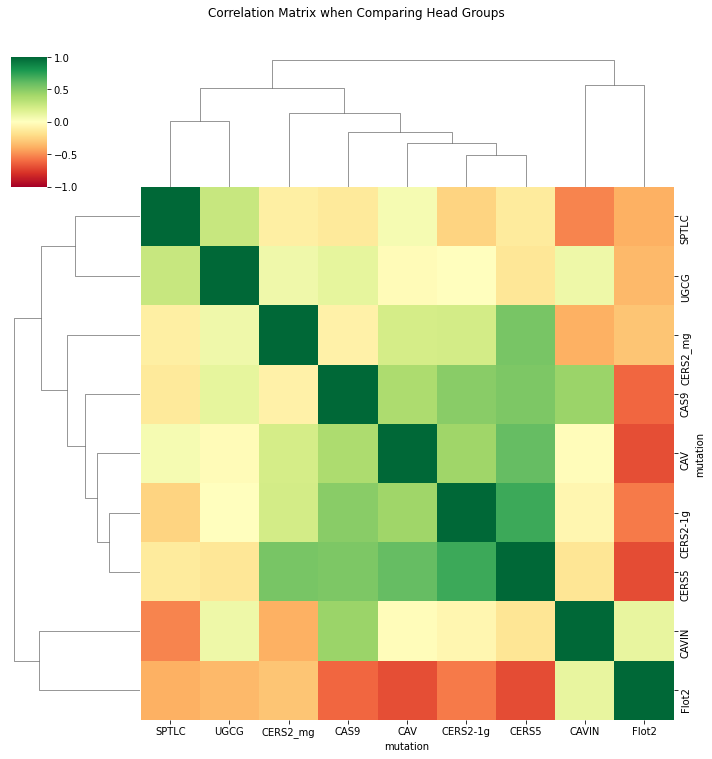

In [27]:
cluster_matrix(df_meta2, df_p, 
            col='Head Group 2', 
            drop_var=['PE', 'PC'],
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Head Groups'
           )

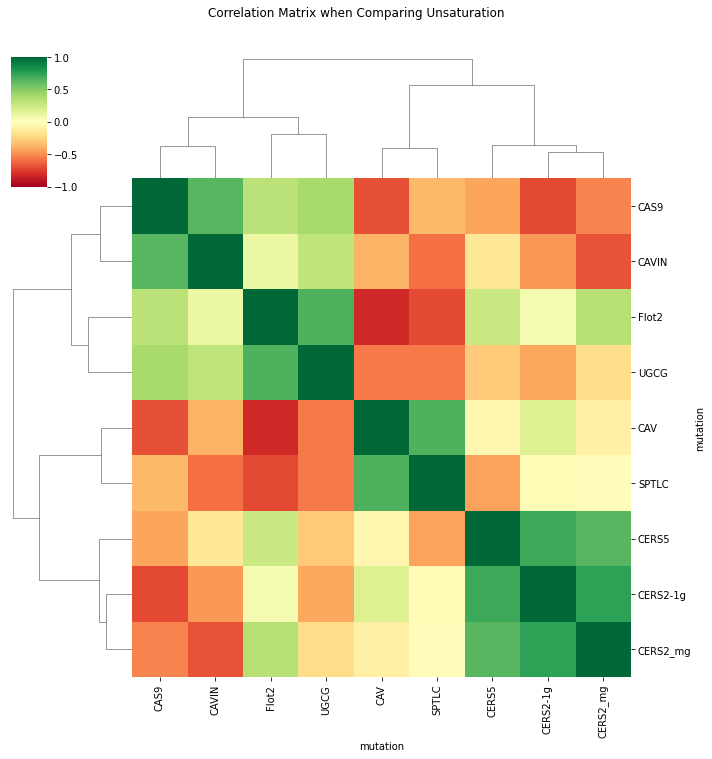

In [28]:
cluster_matrix(df_meta2, df_p, 
            col='Unsaturation', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Unsaturation'
           )

# Heatmaps

In [29]:
def heatmap_norm_col(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Heatmap', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    # normalize by the mutation
    df = norm_col(df)
    
    # name columns so that we can group by them once transposed
    df.columns.names=['mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('mutation').mean()
    
    # transpose so that mutations are in columns again
    df = df.T
    
    sns.clustermap(df, vmin=0, vmax=1, cmap='Reds', annot=annot).fig.suptitle(title, y=1.05)

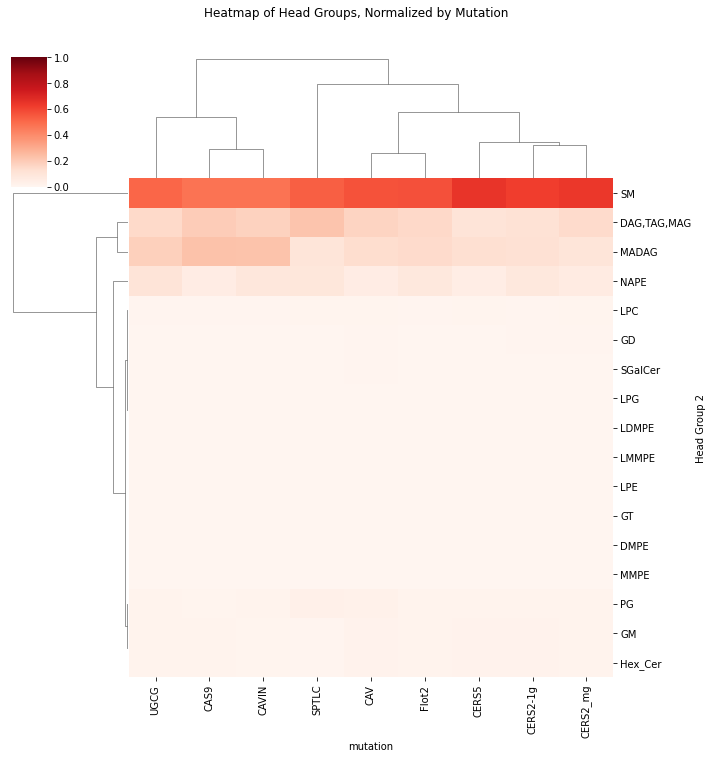

In [30]:
heatmap_norm_col(df_meta2,
        df_p,
        col='Head Group 2',
        drop_var=['PE', 'PC'],
        drop_protein=['WT'],
        title='Heatmap of Head Groups, Normalized by Mutation'
       )

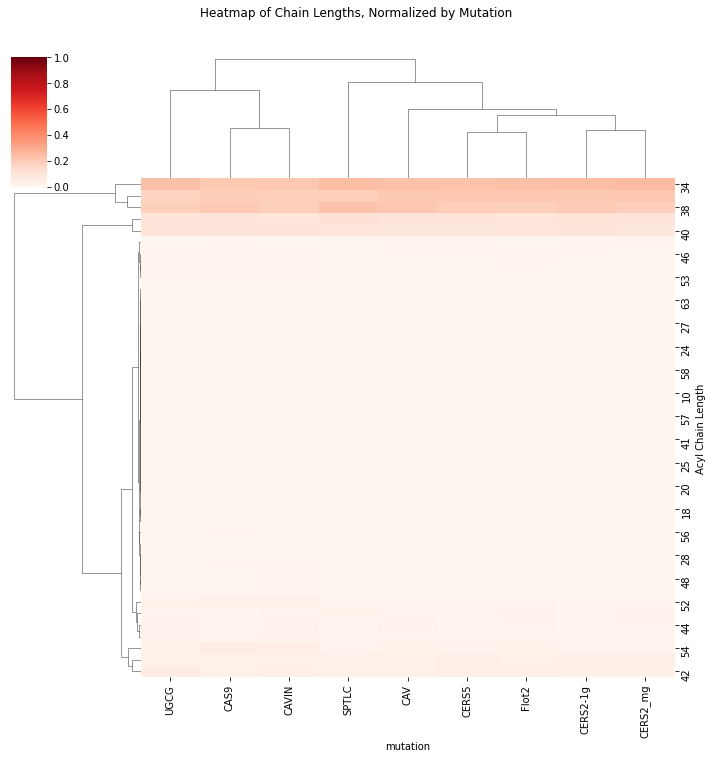

In [31]:
heatmap_norm_col(df_meta2,
        df_p,
        col='Acyl Chain Length',
        drop_protein=['WT'],
        title='Heatmap of Chain Lengths, Normalized by Mutation'
       )

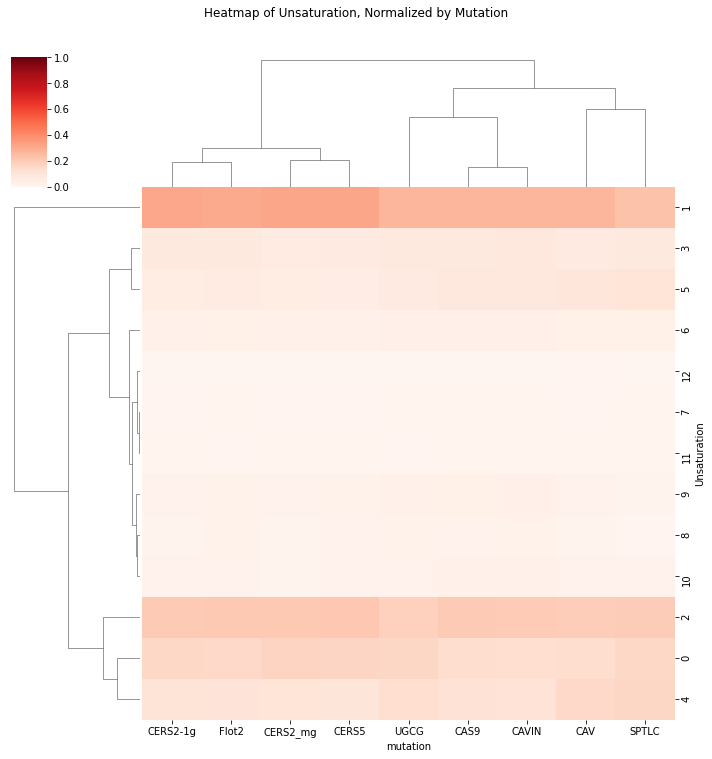

In [32]:
heatmap_norm_col(df_meta2,
        df_p,
        col='Unsaturation',
        drop_protein=['WT'],
        title='Heatmap of Unsaturation, Normalized by Mutation'
       )

In [33]:
def heatmap_norm_row(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Heatmap', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    # normalize by the variable (across the row)
    # df = norm_row(df)
    
    # name columns so that we can group by them once transposed
    df.columns.names=['mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('mutation').mean()
    
    # transpose so that mutations are in columns again
    df = df.T
    df = norm_row(df)
    print(df.sum(axis=1))
    
    sns.clustermap(df, vmin=0, vmax=1, cmap='Reds', annot=annot).fig.suptitle(title, y=1.05)

Head Group 2
DAG,TAG,MAG    1.0
DMPE           1.0
GD             1.0
GM             1.0
GT             1.0
Hex_Cer        1.0
LDMPE          1.0
LMMPE          1.0
LPC            1.0
LPE            1.0
LPG            1.0
MADAG          1.0
MMPE           1.0
NAPE           1.0
PG             1.0
SGalCer        1.0
SM             1.0
dtype: float64


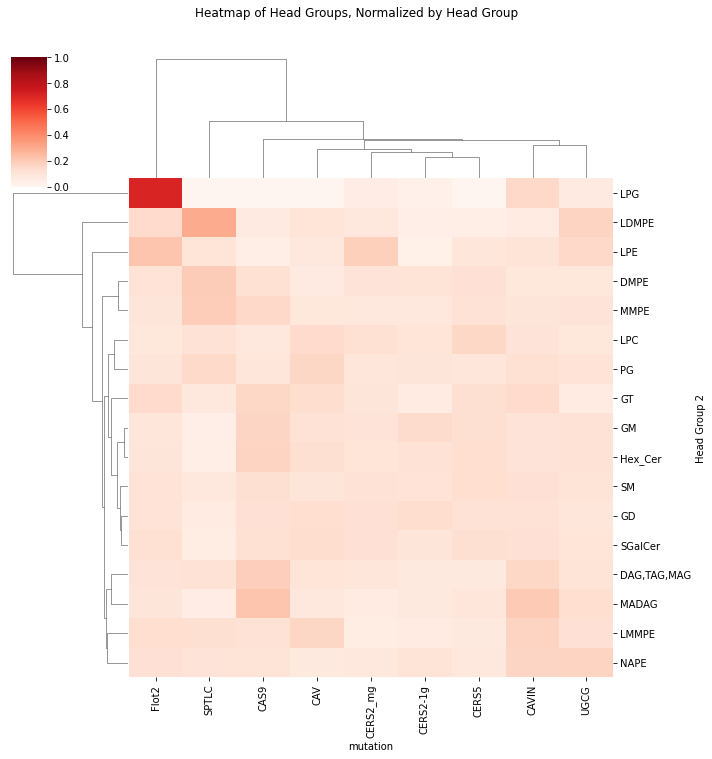

In [34]:
heatmap_norm_row(df_meta2,
                 df_p,
                 col='Head Group 2',
                 drop_var=['PE', 'PC'],
                 drop_protein=['WT'],
                 title='Heatmap of Head Groups, Normalized by Head Group'
                )

Acyl Chain Length
10    1.0
12    1.0
14    1.0
16    1.0
18    1.0
20    1.0
22    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
50    1.0
51    1.0
52    1.0
53    1.0
54    1.0
55    1.0
56    1.0
57    1.0
58    1.0
63    1.0
dtype: float64


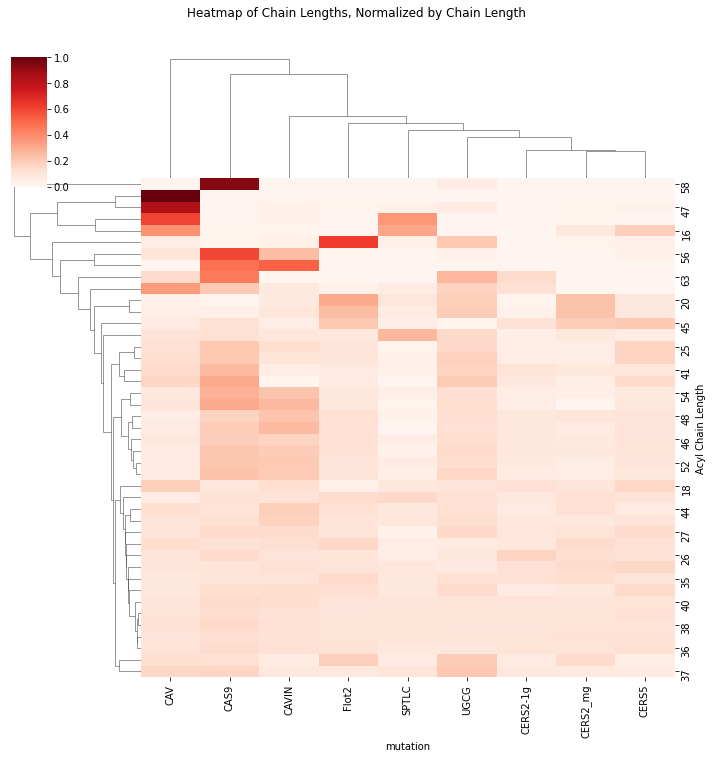

In [35]:
heatmap_norm_row(df_meta2,
        df_p,
        col='Acyl Chain Length',
        drop_protein=['WT'],
        title='Heatmap of Chain Lengths, Normalized by Chain Length'
       )

Unsaturation
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
dtype: float64


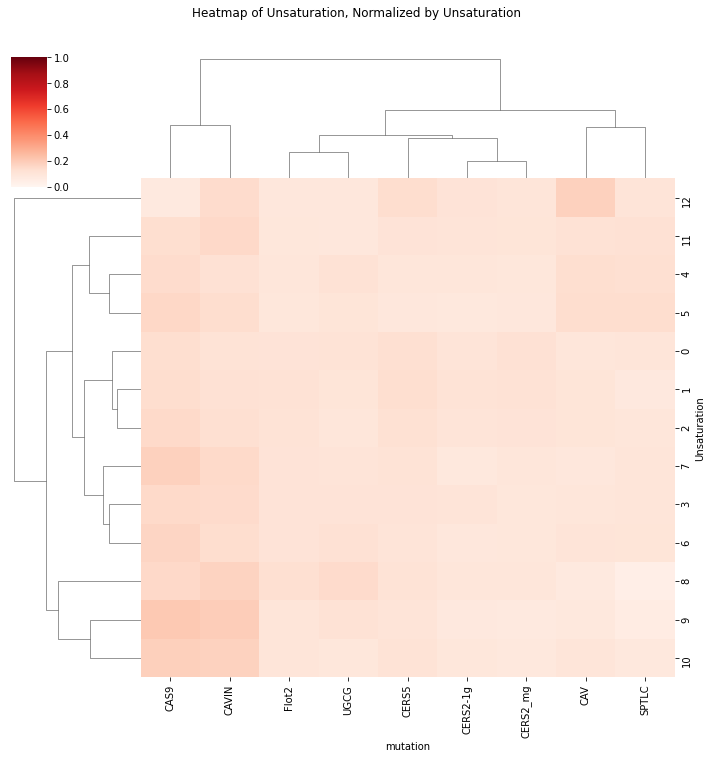

In [36]:
heatmap_norm_row(df_meta2,
                 df_p,
                 col='Unsaturation',
                 drop_protein=['WT'],
                 title='Heatmap of Unsaturation, Normalized by Unsaturation',
                )